# HW 5

This assignment covers Comparision of Decision Trees and Support Vector Machine. 
**DO NOT ERASE MARKDOWN CELLS AND INSTRUCTIONS IN YOUR HW submission**

  * **Q** - QUESTION
  * **A** - Where to input your answer

## Instructions

Keep the following in mind for all notebooks you develop:
* Structure your notebook. 
* Use headings with meaningful levels in Markdown cells, and explain the questions each piece of code is to answer or the reason it is there.
* Make sure your notebook can always be rerun from top to bottom.
* Objective of this assignment is to help you master python and scikit-learn package. 
* See [README.md](README.md) for homework submission instructions

## Related Tutorials
    
* [Decision Tree with KFold Cross Validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

* [Decision Tree with Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html#sklearn.ensemble.BaggingRegressor)

* [Support Vector Machine](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47)


# Data Processing

**Q1** Get training data from the dataframe
1. Load HW5_data.csv from ```data'' folder into the dataframe
2. Check if there is any NaN in the dataset
3. Remove the rows with NaN values.
4. Print how many examples belong to each class in the data frame.

**A1** Replace ??? with code in the code cell below

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib as plt

#Read the data file using the prropriate separator as input to read_csv()

df = pd.read_csv('../data/HW5_data.csv', sep=',')
df.head(10)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
5,121.007812,47.176944,0.229708,0.091336,2.036789,NaN,9.546051,112.131721,0.0
6,79.343750,42.402174,1.063413,2.244377,141.641304,NaN,-0.700809,-1.200653,0.0
7,109.406250,55.912521,0.565106,0.056247,2.797659,19.496527,9.443282,97.374578,0.0
8,95.007812,40.219805,0.347578,1.153164,2.770067,18.217741,7.851205,70.801938,0.0
9,109.156250,47.002234,0.394182,0.190296,4.578595,NaN,5.702532,36.342493,0.0


In [2]:
# check if there is NaN in the dataset
df.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

In [3]:
#Drop NaNs if there is any
df.dropna(inplace=True)

# Count number of entries for different target_class
df['target_class'].value_counts()

0.0    8423
1.0     850
Name: target_class, dtype: int64

**Q2** Separate training and testing data from the dataframe

1. Assign values of ```target_class``` column to ```y```, note you have to use ```.values``` method
2. Drop ```target_class``` column from data frame,
3. Assign df values to x
4. Split dataset into train and test data use train_test_split with test_size = 0.25, stratify y and random_state = 1238

**A2** Replace ??? with code in the code cell below

In [4]:
# Assign values of ```target_class``` column to y, note you have to use .values method
y = df['target_class'].values
# Drop 'target_class' column from data frame,
df.drop('target_class', axis=1, inplace=True)# Assign df values to x
x = df.values

# View shape of x and y
print(x.shape)
print(y.shape)

xtrain, xtest, ytrain, ytest =  train_test_split(x, y, test_size=0.25, stratify=y, random_state=1238)

(9273, 8)
(9273,)


# Decision Tree

## Decision Tree with different depth

**Q3** Train DecisionTreeClassifier Model at different depths 
1. Create four [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) models with different parameters. Use max_depth size = 1, 2, 5, 25 & max_leaf_nodes=5, 10, 15, 25 respectively
2. Use random_state=30 & criterion='entropy' for all models
3. Fit the four different models with the train data.
4. Predict the test data using trained models 
5. Calculate the Mean Squared Error(MSE) of each model's prediction
6. Print precision recall curve for the test data with the minimum MSE value from four trianed models.

**A3** Replace ??? with code in the code cell below

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

#create decision tree classifier
clf_1 = DecisionTreeClassifier(criterion='entropy', max_depth=1, max_leaf_nodes=5, random_state=30)
clf_2 = DecisionTreeClassifier(criterion='entropy', max_depth=2, max_leaf_nodes=10, random_state=30)
clf_3 = DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=15, random_state=30)
clf_4 = DecisionTreeClassifier(criterion='entropy', max_depth=25, max_leaf_nodes=25, random_state=30)

#fit classifier model
clf_1.fit(xtrain, ytrain)
clf_2.fit(xtrain, ytrain)
clf_3.fit(xtrain, ytrain)
clf_4.fit(xtrain, ytrain)

#predict
pred_1 = clf_1.predict(xtest)
pred_2 = clf_2.predict(xtest)
pred_3 = clf_3.predict(xtest)
pred_4 = clf_4.predict(xtest)

#calculate mean_squared_error
mse_1 = mean_squared_error(ytest, pred_1)
mse_2 = mean_squared_error(ytest, pred_2)
mse_3 = mean_squared_error(ytest, pred_3)
mse_4 = mean_squared_error(ytest, pred_4)

min_mse = min(mse_1, mse_2, mse_3, mse_4)

if min_mse == mse_1:
    best_model = clf_1
elif min_mse == mse_2:
    best_model = clf_2
elif min_mse == mse_3:
    best_model = clf_3
else:
    best_model = clf_4

print('The MSE for eash models predictions: ')
print('MSE Model 1: ', mse_1)
print('MSE Model 2: ', mse_2)
print('MSE Model 3: ', mse_3)
print('MSE Model 4: ', mse_4)

print('\nBest model is as follows: ')
display(best_model)



The MSE for eash models predictions: 
MSE Model 1:  0.0258732212160414
MSE Model 2:  0.0258732212160414
MSE Model 3:  0.02501078050884002
MSE Model 4:  0.0258732212160414

Best model is as follows: 


DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=15,
                       random_state=30)

### Precision-Recall Curve for Best Above

``Important Note:`` If ``from_estimator()`` function gives Attribute error then it means your sklearn is not updated.

* If you are using conda, you can upgrade with

conda upgrade -c conda-forge scikit-learn

* or, with pip,

python -m pip install scikit-learn --upgrade


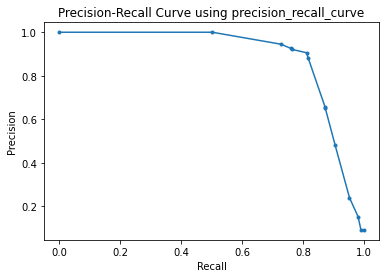

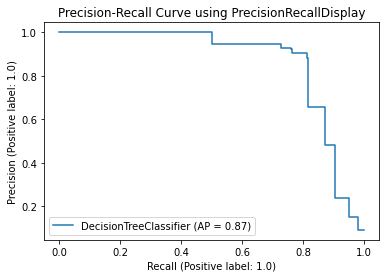

In [6]:
# Use the below one
from sklearn.metrics import precision_recall_curve
# Or this below one, whichever suits you
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(ytest, best_model.predict_proba(xtest)[:,1])
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve using precision_recall_curve')
plt.show()

disp = PrecisionRecallDisplay.from_estimator(best_model, xtest, ytest)
plt.title('Precision-Recall Curve using PrecisionRecallDisplay')
plt.show()


### Decision Tree with K-fold cross validation

**Q4** Use Kfold on the test dataset, and evaluate the best model
1. Use cross_val_score and fit your best model with k = 5 fold size on test data
2. Calculate average scores in kfold

**A4** Replace ??? with code in the code cell below

In [7]:
from sklearn.model_selection import KFold, cross_val_score

scores = cross_val_score(best_model, x, y, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.97951482 0.97897574 0.97735849 0.97734628 0.97842503]
Average cross-validation score: 0.98


###  Decision Tree with Bagging 

**Q5** Now we will use Bagging technique on the our previous best model, and evaluate it

```Part 1:```
1. Now, Create a Bagged Model passing  ```model = previous_best, n_estimators = 10 & random_state=1 to BaggingClassifier()```
2. Fit the model with the train data
3. Predict the values with the test data
4. Calculate the test MSE 
5. Plot Precision-Recall Curve from the true & predicted test data

**A5** Replace ??? with code in the code cell below

MSE is :  0.02630444156964209


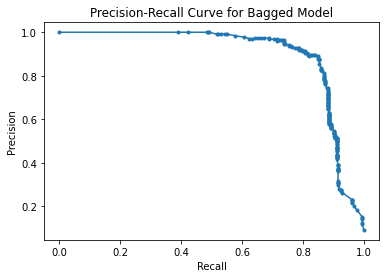

In [8]:
from sklearn.ensemble import BaggingClassifier

# Use BaggingRegressor to fit the training data
# Calculate the mean squared error 

#load BaggingRegressor model and pass n_estimators=10, random_state=1
bagged_clf = BaggingClassifier(base_estimator=best_model, n_estimators=10, random_state=1)
bagged_clf.fit(xtrain, ytrain)
pred = bagged_clf.predict(xtest)

MSE = mean_squared_error(ytest, pred)
print('MSE is : ', MSE)

precision, recall, _ = precision_recall_curve(ytest, bagged_clf.predict_proba(xtest)[:, 1])
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Bagged Model')
plt.show()


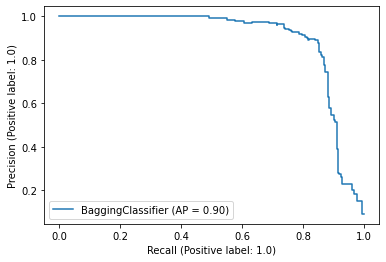

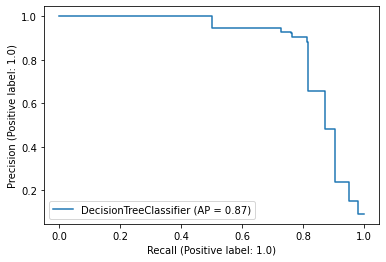

In [9]:
#pass necessary parameters to PrecisionRecallDisplay.from_estimator() 

PrecisionRecallDisplay.from_estimator(bagged_clf, xtest, ytest)
disp.plot()
plt.show()


```Part 2: ```

1. Why BaggingClassifier is called an ensembled technique? why it works better most of the time than the single model classifiers?

#### It's called an ensemble technique because it combines predictions of the base models to improve performance and reduce variance. Works by reducing overfitting, variance reduction, and is better at handling unbalanced datasets.

2. What is the disadvantage of incresing the number of estimators while using BaggingClassifier? Explain with an appropriate example.

#### Increasing the number of estimators can result in dimenishing returns and things such as prediction time can take longer, computataionally expensive, and can take up resources when deploying. An example could be having 10 models that produce decent accuracy, say for identifying images, but if you increase that number to 50 or even 100, you might gain some accuracy but at a cost that is not worth it. Your accuracy may increase marginally but your overhead, compute time, etc will all be negatively impacted.


# Support Vector Machine(SVM)

**Q6** Create SVM Model on the training set, and do the following

```Part:1```
1. Now, Create a SVM Model with default parameters
2. Fit the model with the train data
3. Predict the values with the test data
4. Calculate the model accuracy on test data
5. Plot confusion matrix on the test data  (Make font size 16)


**A6** Replace ??? with code in the code cell below

In [10]:
# import SVC classifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc= SVC()

# fit classifier to training set
svc.fit(xtrain, ytrain)

# make predictions on test set
y_pred = svc.predict(xtest)

# compute and print accuracy score
acc = accuracy_score(ytest, y_pred)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(acc))

Model accuracy score with default hyperparameters: 0.9685


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(ytest, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, values_format='.0f')
plt.title("SVM Model - Confusion Matrix")
plt.show()

```Part2:```

1. From the above Confusion Matrix we can see that high number of Class 1 is predicted as Class 0 from the model. What is your reasoning behind this situtation? 

#### Unbalanced data not so great hyperparameters

2. What can be done in order to resolve this issue?

#### Fix data issues like trying to limit oversampling in the minority class, adjust kernel size.

## SVM with high margin

**Q7** Create SVM Model on the training set, and evaluate

``Note:``
1. If we analyze our dataset using df.describe() function, we will see that there are many outliers in the dataset.
2. So, we need to increase our margin with ```HIGH C``` values so that the SVM model get better generalization

``Task:``

1. Now, Create a SVM Model with rbf kernel and C=100
2. Fit the model with the train data
3. Predict the values with the test data
4. Calculate the model accuracy on test data 
5. Plot Confusion Matrix from the true & predicted test data (Make font size 16)


**A7** Replace ??? with code in the code cell below


In [ ]:
# Instantiate classifier with rbf kernel and C=100
svc = SVC(kernel='rbf', C=100)

# Fit classifier to training set
svc.fit(xtrain, ytrain)

# Make predictions on test set
y_pred = svc.predict(xtest)

# Compute and print accuracy score
accuracy = accuracy_score(ytest, y_pred)
print(f'Model accuracy score with rbf kernel and C=100.0: {accuracy:.4f}')


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as pl

# Plot confusion matrix
cm = confusion_matrix(ytest, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, values_format='.0f')
plt.title("SVM Model - Confusion Matrix")
plt.show()


## SVM with linear kernel

**Q8** Create SVM Model on the training set, and evaluate

``Task:``

1. Now, Create a SVM Model with linear kernel and C=1.0
2. Fit the model with the train data
3. Predict the values with the test data
4. Calculate the model accuracy on test data
5. Plot Confusion Matrix from the true & predicted test data (Make font size 16)


**A8** Replace ??? with code in the code cell below


In [ ]:
# Instantiate classifier with linear kernel and C=1.0
linear_svc = SVC(kernel='linear', C=1.0)

# Fit classifier to training set
linear_svc.fit(xtrain, ytrain)

# Make predictions on test set
y_pred = linear_svc.predict(xtest)

# Compute and print accuracy score
accuracy = accuracy_score(ytest, y_pred)
print(f'Model accuracy score with linear kernel and C=1.0: {accuracy:.4f}')


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as pl

cm = confusion_matrix(ytest, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, values_format='.0f')
plt.title("SVM Model - Confusion Matrix")
plt.show()

**Q9** Create a Grid Search for finetuning the value of ```C``` in SVM Model on the ```training set```,

``Task:``

1. Now, Create a SVM Model with linear kernel and evaluate the model for different values of C. ```Use 'C': [0.01, 0.1, 5, 10, 100]```
2. Use the [sklearn GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) method for finetuning the ```linear SVM```.
3. Use ```3``` fold of Cross Validation
4. Use ```accuracy``` as the scoring technique
5. Use ```clf.cv_results_ & clf.best_params_``` for getting the fine-tuned results from the Cross Validation run.
5. Now, Plot the Confusion Matrix for test data, using the ```best value of C``` we found from our finetune.  

Note: The Grid Search may take couple of minutes. Please wait untill the cell compiles

**A9** Replace ??? with code in the code cell below


In [ ]:
from sklearn.model_selection import GridSearchCV

# Select the optimal C parameter by cross-validation
tuned_parameters = {'C': [0.01, 0.1, 5, 10, 100]}

In [ ]:
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=3, scoring='accuracy')

In [ ]:
clf.fit(xtrain, ytrain)

In [ ]:
best_model= clf.best_estimator_
y_pred = best_model.predict(xtest)
cm = confusion_matrix(ytest, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, values_format='.0f')
plt.title("SVM Model - Confusion Matrix")
plt.show()

### We can see that after using the Best Value of ```C```, we have less amount of false positive in our test data prediction.